<a href="https://colab.research.google.com/github/CesarFerrer97/Data-Science-01/blob/main/ProyectoDSParteIFerrer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto:Analisis sobre la perdida de clientes en un banco.

Objetivo: Determinar los factores que inciden en la deserción de clientes del banco.

Hipótesis:

1) Los clientes que realizan un menor número de transacciones mensuales tienen una mayor probabilidad de abandono.

2) Los clientes con un mayor límite de crédito tienen una mayor probabilidad de quedarse.

3) No hay grandes diferencias en  género, nivel educativo o estado civil entre aquellos que fueron clientes del banco y aquellos actuales.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar datos
df = pd.read_csv('https://raw.githubusercontent.com/CesarFerrer97/Data-Science-01/refs/heads/main/BankChurners.csv')
print(df.shape )
print(df.columns)

(10127, 23)
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')


In [3]:
# Por recomendación de la página de donde se sacó la base de datos eliminamos las dos últimas columnas
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])
print(df.shape )

(10127, 21)


In [4]:
print(df.dtypes)

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object


In [5]:
print("Datos Nulos:\n\n", df.isna().sum())

Datos Nulos:

 CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64


In [6]:
print("Datos Duplicados:\n\n", df.duplicated().sum())

Datos Duplicados:

 0


No hay datos faltantes ni datos duplicados en el dataset.

Hago una exploración visual de algunos campos del dataset

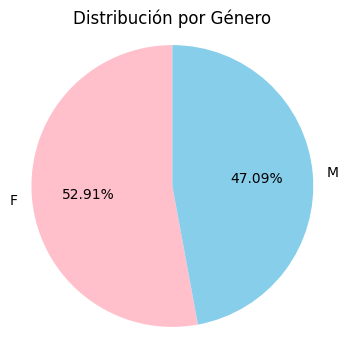

In [7]:
conteos_genero = df['Gender'].value_counts()
colores = ['pink', 'skyblue']
plt.figure(figsize=(4, 4))
plt.pie(conteos_genero, labels=conteos_genero.index, autopct='%1.2f%%', startangle=90, colors=colores)
plt.title('Distribución por Género')
plt.axis('equal')
plt.show()

Como cabría esperar la distribución por género entre clientes es bastante igualitaria.

Text(0, 0.5, 'Nivel educativo')

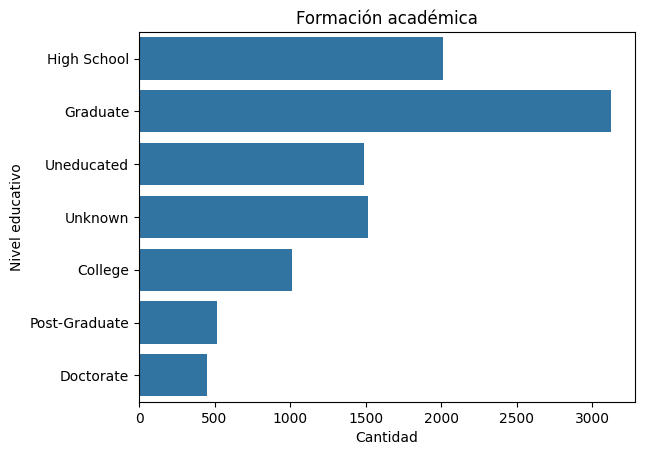

In [8]:
#countplot on 'Education_Level' column
sns.countplot(data=df,y='Education_Level')
plt.title("Formación académica")
plt.xlabel("Cantidad")
plt.ylabel("Nivel educativo")

La mayoría de los clientes del banco tienen estudios de nivel secundario o universitario, mientras que los niveles más avanzados tienen una menor proporción.

Text(0, 0.5, 'Cantidad')

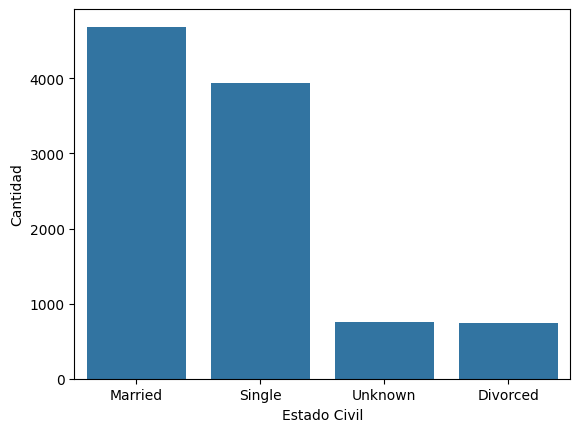

In [9]:
#countplot on 'Marital_Status' column
sns.countplot(data=df,x='Marital_Status')
plt.xlabel("Estado Civil")
plt.ylabel("Cantidad")


La mayoría de los clientes del banco se encuentra casados o soltores.

Text(0, 0.5, 'Cantidad')

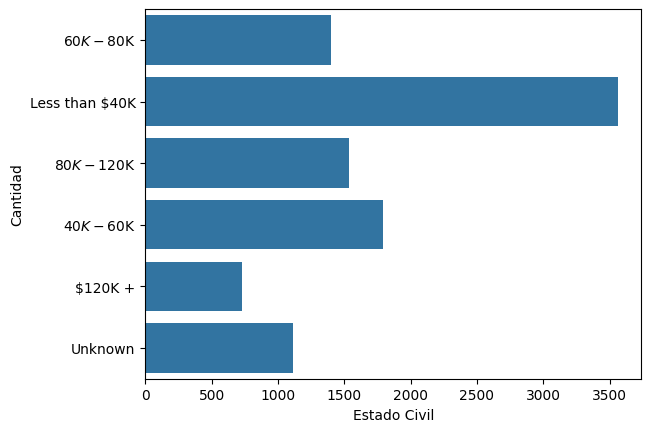

In [10]:
#countplot on 'Income_Category' column
sns.countplot(data=df,y='Income_Category')
plt.xlabel("Estado Civil")
plt.ylabel("Cantidad")

La gran mayoría de los clientes del banco ganan menos de 40k seguido por aquellos que ganan entre 40K y 60K.

Text(0, 0.5, 'Cantidad')

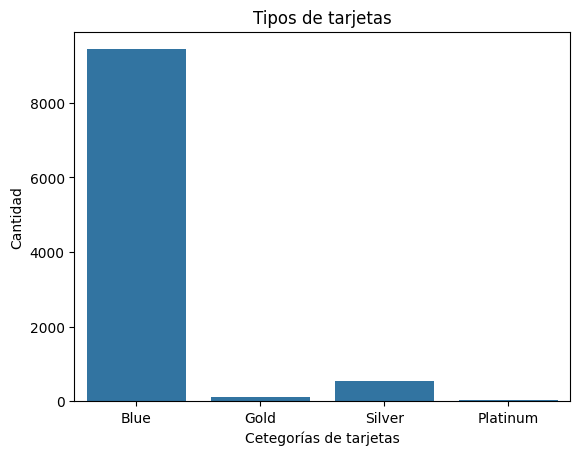

In [11]:
#countplot on 'Card_Category' column
sns.countplot(data=df,x='Card_Category')
plt.title("Tipos de tarjetas")
plt.xlabel("Cetegorías de tarjetas")
plt.ylabel("Cantidad")

En consonancia con el gráfico anterior, se observa que la categoría de tarjeta predominante entre los clientes del banco es la 'Blue', la de menor nivel.

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


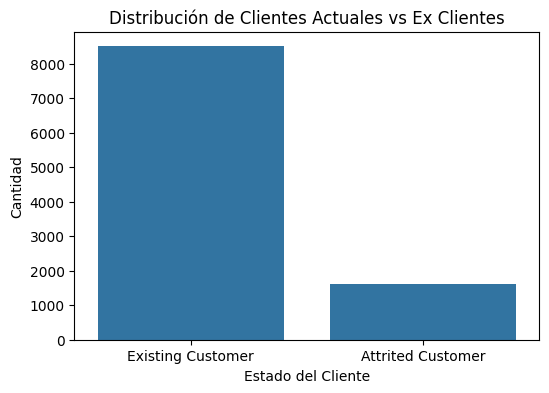

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Attrition_Flag", data=df)
plt.title("Distribución de Clientes Actuales vs Ex Clientes")
plt.xlabel("Estado del Cliente")
plt.ylabel("Cantidad")
print(df["Attrition_Flag"].value_counts())

Aproximadamente el 16% de los registros pertenecen a ex clientes del banco.

Hecho ya un pantallazo general de los datos. Nos enfocaremos en ver si hay diferencias significativas entre los clientes actuales y los ex clientes. Para ello, comenzaremos analizando las variables categóricas respecto a "Attrition_Flag"

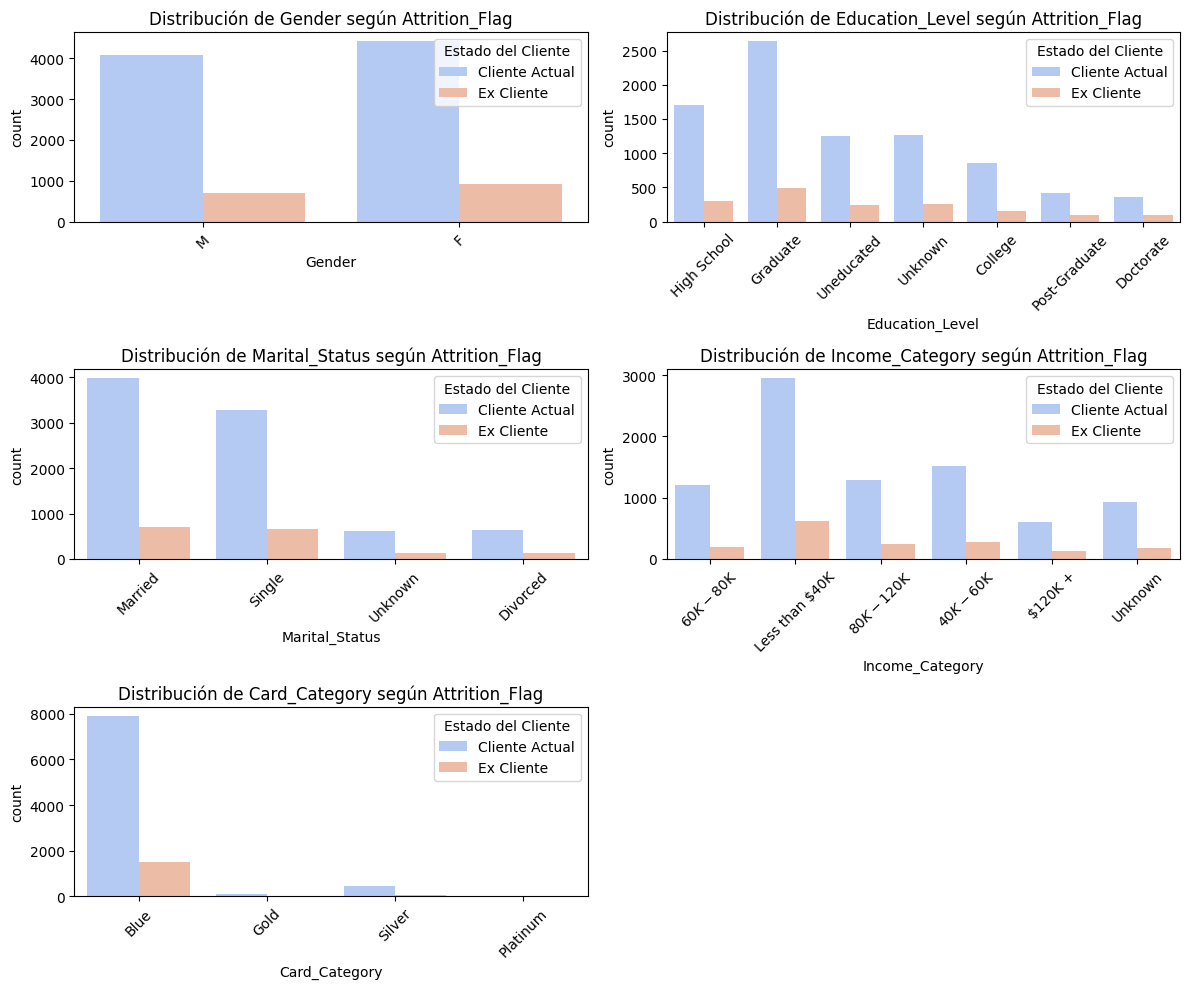

In [ ]:
# Convertir la variable objetivo a numérica donde 0 son clientes actuales y 1 los que se fueron
df["Attrition_Flag_Num"] = np.where(df["Attrition_Flag"] == "Attrited Customer", 1, 0)

# Seleccionar variables categóricas
categorical_vars = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Graficar la distribución de cada variable categórica según el estado del cliente
plt.figure(figsize=(12, 10))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=var, hue="Attrition_Flag", palette="coolwarm")
    plt.title(f"Distribución de {var} según Attrition_Flag")
    plt.xticks(rotation=45)
    plt.legend(title="Estado del Cliente", labels=["Cliente Actual", "Ex Cliente"])

plt.tight_layout()
plt.show()


 Al examinar los gráficos no parece haber una relación fuerte entre la pérdida de clientes y las variables categóricas presentes en el dataset. Esto sugiere que deberíamos explorar las variables numéricas. En base a estos hallazgos podriamos confirmar la hipótesis 3.

Attrition_Flag_Num        1.000000
Contacts_Count_12_mon     0.204491
Months_Inactive_12_mon    0.152449
Dependent_count           0.018991
Customer_Age              0.018203
Months_on_book            0.013687
Avg_Open_To_Buy          -0.000285
Credit_Limit             -0.023873
CLIENTNUM                -0.046430
Total_Amt_Chng_Q4_Q1     -0.131063
Name: Attrition_Flag_Num, dtype: float64


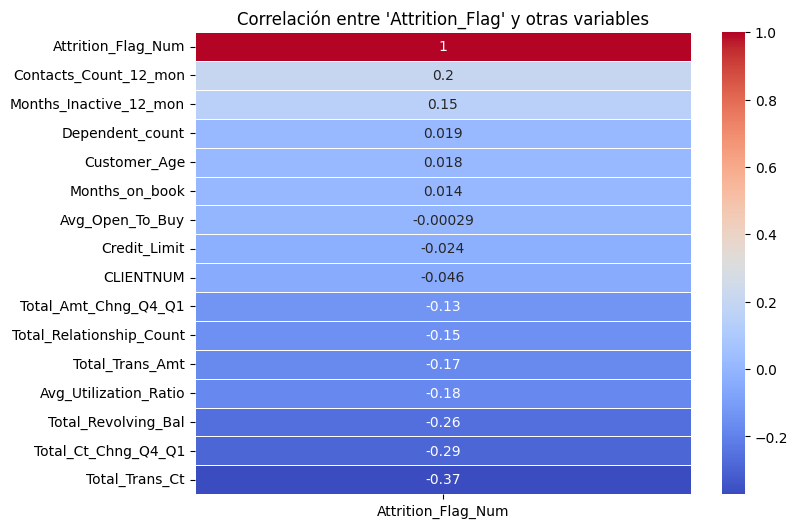

In [ ]:
# Seleccionar solo las columnas numéricas para evitar errores
df_numeric = df.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Filtrar solo las correlaciones con la variable de interés
correlations = corr_matrix["Attrition_Flag_Num"].sort_values(ascending=False)

# Mostrar las 10 variables más correlacionadas
print(correlations.head(10))

# Visualizar con un heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[["Attrition_Flag_Num"]].sort_values(by="Attrition_Flag_Num", ascending=False),
            annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Correlación entre 'Attrition_Flag' y otras variables")
plt.show()



🔹 Conclusiones

📌 Los clientes que usan menos la tarjeta de crédito y tienen menos transacciones son los más propensos a irse, lo que parece confirmar la hipótesis 1.

📌 Un aumento en los contactos con el banco puede ser una señal de insatisfacción antes de abandonar.

📌 Los clientes con más meses de inactividad también tienen más chances de dejar el banco.

📌 Variables como el límite de crédito, la edad y la cantidad de meses como cliente no parecen ser factores determinantes. Esto parece indicar que la hipotesis 2 es que afirma que los clientes con un mayor límite de crédito tienen una mayor probabilidad de quedarse es falsa.



🔹 Algunas posibles recomendaciones (con lo visto hasta ahora)

✅ Implementar programas de lealtad que ofrezcan recompensas atractivas por el uso frecuente de la tarjeta de crédito y la realización de transacciones.

✅ Capacitar al personal de atención al cliente para que pueda resolver los problemas de los clientes de manera eficiente y empática.

✅ mplementar campañas de correo electrónico o mensajes de texto para recordar a los clientes inactivos los beneficios de utilizar los productos y servicios del banco.

✅ Realizar encuestas o entrevistas a clientes inactivos para identificar las razones por las que dejaron de utilizar los productos y servicios del banco.